# Exercise 10

In this exercise, I will be using `bar plots` to compare the 100 most frequent words of two separate corpora. One corpus consists of Shakespeare's works while the other one contains dialogue from contemporary English TV shows.
Additionally, I will check if these corpora are obeying Zipf's law.


In [87]:
import os

Before being able to do so, the two corpora are imported and tokenized and the respective individual words have to be counted and sorted.

In [88]:
folder_sp = "../exercise-5/corpus/"
files_sp = [os.path.join(folder_sp, f) for f in os.listdir(folder_sp) if os.path.isfile(os.path.join(folder_sp, f))]

tokens_sp = []
for path in files_sp:
    with open(path, "r", encoding="utf-8") as f:
        prep_tokens_sp = f.read().split()
        tokens_sp.extend([token.lower().strip().strip(",:'.!?[]()=-/\_@") for token in prep_tokens_sp])

#test:
print(tokens_sp[:5])

['a', 'midsummer', "night's", 'dream', 'by']


In [89]:
with open("corpus/tv_text.txt", encoding="UTF-8") as f:
    file_tv = f.read()
    f.close()

prep_tokens_tv = file_tv.split()
tokens_tv = [token.lower().strip(",:'.!?[]()=-/\_@") for token in prep_tokens_tv]

#test:
print(tokens_tv[:5])

['5793297', 'chuck', 'houston', 'was', 'the']


In [90]:
# as seen above: sp = shakespeare corpus and tv = TV corpus

count_sp = {}
for token in tokens_sp:
    if token in count_sp:
        count_sp[token] += 1
    else:
        count_sp[token] = 1
        
sorted_counts_sp = sorted(count_sp.items(), key=lambda item: item[1], reverse=True)


count_tv = {}
for token in tokens_tv:
    if token in count_tv:
        if token != "":
            count_tv[token] += 1
    else:
        count_tv[token] = 1
        
sorted_counts_tv = sorted(count_tv.items(), key=lambda item: item[1], reverse=True)

#test:
print("Top5 Shakespeare:")
for (token, count) in sorted_counts_sp[:5]:
    print("{token}\t\t ({count} occurences)".format(token=token, count=count))

print("\nTop5 English TV:")
for (token, count) in sorted_counts_tv[:5]:
    print("{token}\t\t ({count} occurences)".format(token=token, count=count))
    

Top5 Shakespeare:
the		 (29236 occurences)
and		 (28282 occurences)
to		 (21905 occurences)
i		 (21529 occurences)
of		 (18428 occurences)

Top5 English TV:
you		 (80256 occurences)
i		 (79928 occurences)
the		 (63209 occurences)
to		 (49193 occurences)
s		 (43624 occurences)


In [91]:
sum_sp = 0
frequency_sp = []
for token, count in sorted_counts_sp:
    sum_sp += count

for token, count in sorted_counts_sp:
    frequency_sp.append((token, count/sum_sp))

sum_tv = 0
frequency_tv = []
for token, count in sorted_counts_tv:
    sum_tv += count

for token, count in sorted_counts_tv:
    frequency_tv.append((token, count/sum_tv))

#test:
print("Top5 Shakespeare:")
for (token, freq) in frequency_sp[:5]:
    print("{token}\t\t Frequency: {freq} ".format(token=token, freq=freq))

print("\nTop5 English TV:")
for (token, freq) in frequency_tv[:5]:
    print("{token}\t\t Frequency: {freq} ".format(token=token, freq=freq))


Top5 Shakespeare:
the		 Frequency: 0.030386619743195856 
and		 Frequency: 0.029395073867049704 
to		 Frequency: 0.0227670989695822 
i		 Frequency: 0.022376301014203844 
of		 Frequency: 0.0191532572385967 

Top5 English TV:
you		 Frequency: 0.03770510749732913 
i		 Frequency: 0.03755100966963869 
the		 Frequency: 0.029696248751478728 
to		 Frequency: 0.02311138548041407 
s		 Frequency: 0.020495011082828522 


In [92]:
x_axis_sp = []
for (token, freq) in frequency_sp[:100]:
    x_axis_sp.append(token)

y_axis_sp = []
for (token, freq) in frequency_sp[:100]:
    y_axis_sp.append(freq)

x_axis_tv = []
for (token, freq) in frequency_tv[:100]:
    x_axis_tv.append(token)

y_axis_tv = []
for (token, freq) in frequency_tv[:100]:
    y_axis_tv.append(freq)

In [93]:
ranks = range(1,101)
zipf = [0.1/rank for rank in ranks]

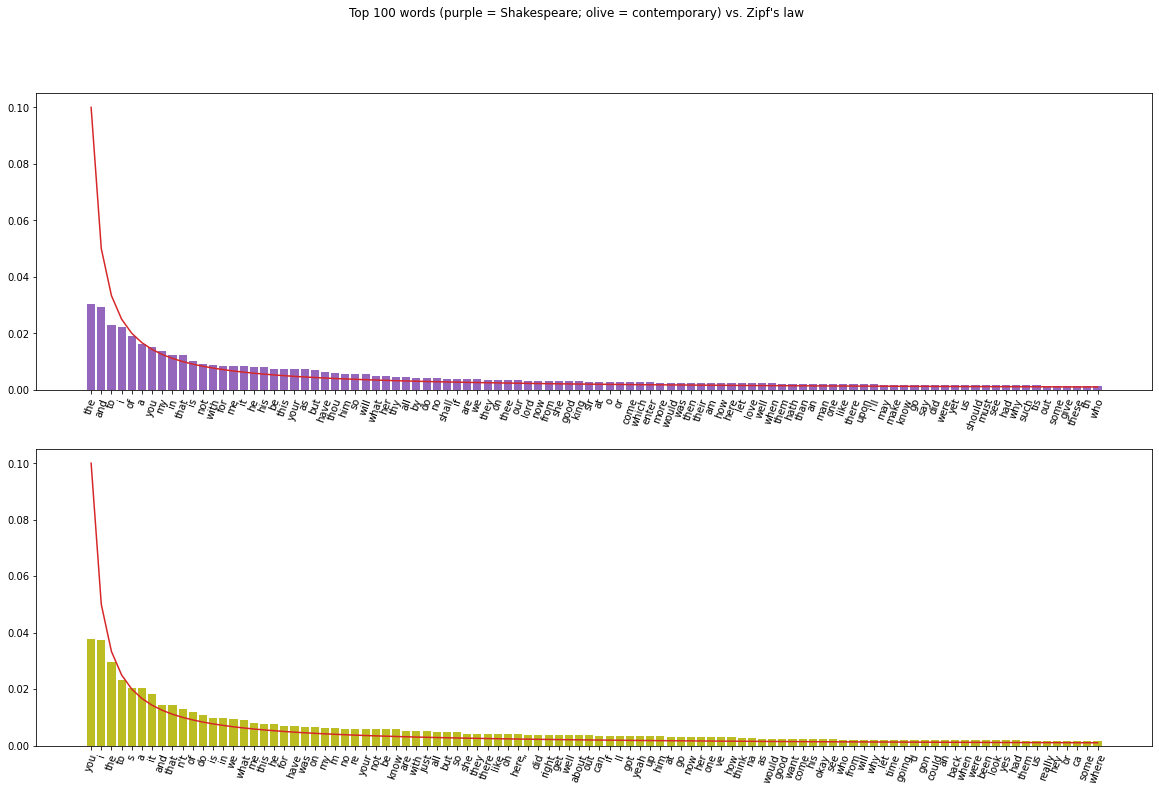

In [95]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(2, 1, figsize=(20,12))
figure.suptitle("Top 100 words (purple = Shakespeare; olive = contemporary) vs. Zipf's law")

ax[0].bar(x_axis_sp, y_axis_sp, color="tab:purple")
ax[0].tick_params(axis="x", labelrotation = 70)
ax[0].plot(x_axis_sp, zipf, color="tab:red", label="Zipf")

ax[1].bar(x_axis_tv, y_axis_tv, color="tab:olive")
ax[1].tick_params(axis="x", labelrotation = 70)
ax[1].plot(x_axis_tv, zipf, color="tab:red", label="Zipf")

plt.show()

## Conclusion:

One can see that the distribution of word frequencies vaguely obeys Zipf's law, but it's not an exact science of any sort.